# Описание задачи

Для выполнение работы я выбрал датасет **Mushroom Classification** с сайта Kaggle.com
https://www.kaggle.com/uciml/mushroom-classification

Набор состоит из информации о 8124 грибах. Целевая переменная - класс гриба. **Ядовитый или съедобный.** У каждого гриба есть 22 признака. Все признаки категориальные. **Задача классификации.** Необходимо построить модели машинного обучения для классификации грибов.

# Загрузка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
msh = pd.read_csv('mushrooms.csv')

# Описательный анализ данных

In [3]:
msh.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [4]:
msh.shape

(8124, 23)

В тренировочном наборе данных присутствует информация о <b>8124 грибах</b>
Каждый описан при помощи <b>22 признаков</b>

In [5]:
msh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [7]:
msh.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


## Исследование шкалы измерения каждого существенного признака

Все признаки в данном наборе данных являются категориальными

ОПИСАНИЕ ПРИЗНАКОВ С KAGGLE


**cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises:** bruises=t,no=f

**odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment:** attached=a,descending=d,free=f,notched=n

**gill-spacing:** close=c,crowded=w,distant=d

**gill-size:** broad=b,narrow=n

**gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape:** enlarging=e,tapering=t

**stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**veil-type:** partial=p,universal=u

**veil-color:** brown=n,orange=o,white=w,yellow=y

**ring-number:** none=n,one=o,two=t

**ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

**population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


Все признаки, за исключением ring-number предлагается рассматривать в качестве номинальных. Они будут переведены в номинальную шкалу и декадированы при помощи техники **one-hot-encoding**

**ring-number** является порядковым признаком и, соответственно, будет декодирован слелюущим образом: n -> 0, o -> 1, t -> 2

## Построение эмпирического распределения каждого существенного признака

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def plot(col, hue=None, color=['red', 'green'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    if labels != None:
        ax.set_xticklabels(labels)
    sns.countplot(col, hue=hue, palette=color, data=msh, ax=ax)
    title = 'Распределение по признаку **{}**'.format(col.title())
    ax.set(title=title, xlabel=col.title(), ylabel="Количество")

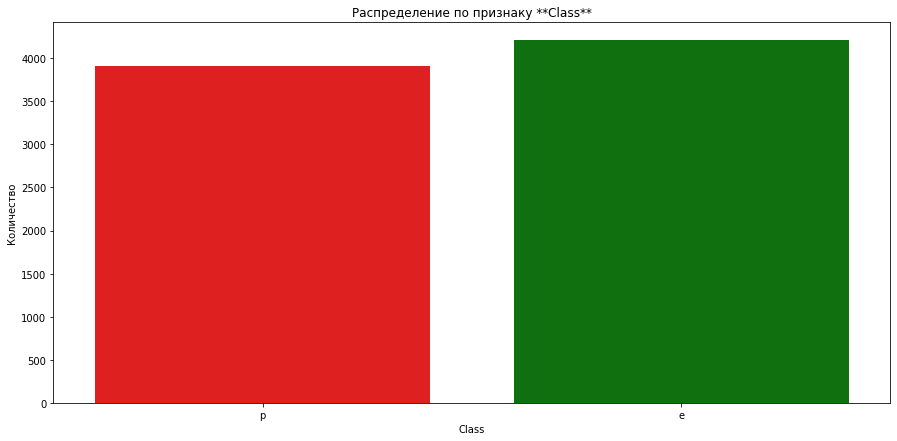

In [10]:
plot(col='class')

Построим распределение категориальных признаков, дополнительно оценивая их распределение по целевой переменной (аргумент функции hue)

In [11]:
msh.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

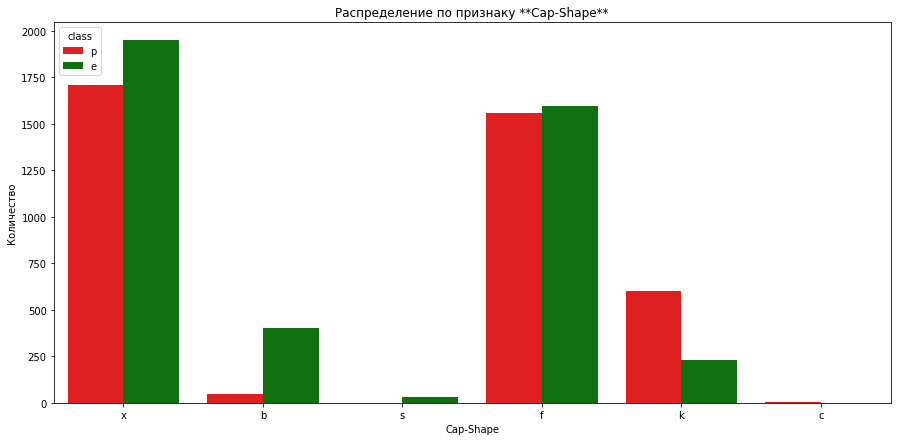

In [12]:
plot(col='cap-shape', hue='class')

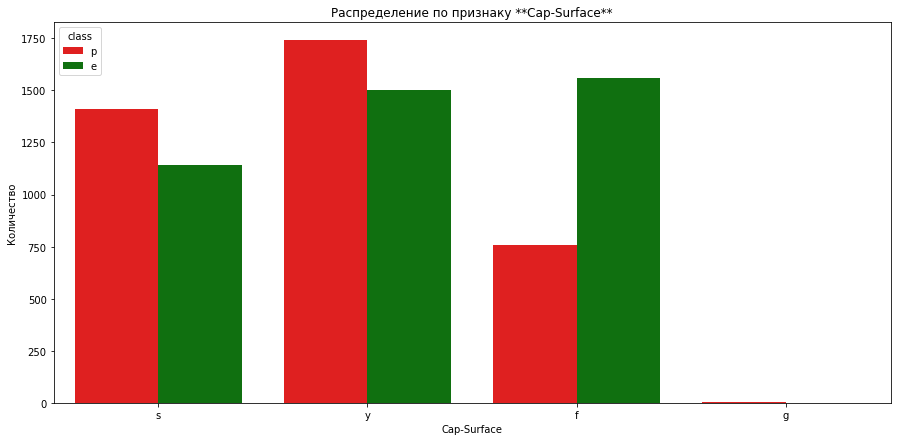

In [13]:
plot(col='cap-surface', hue='class')

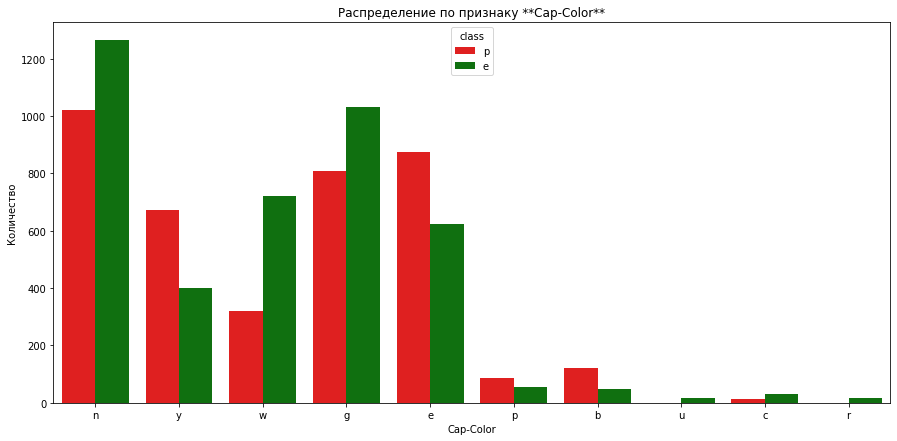

In [14]:
plot(col='cap-color', hue='class')

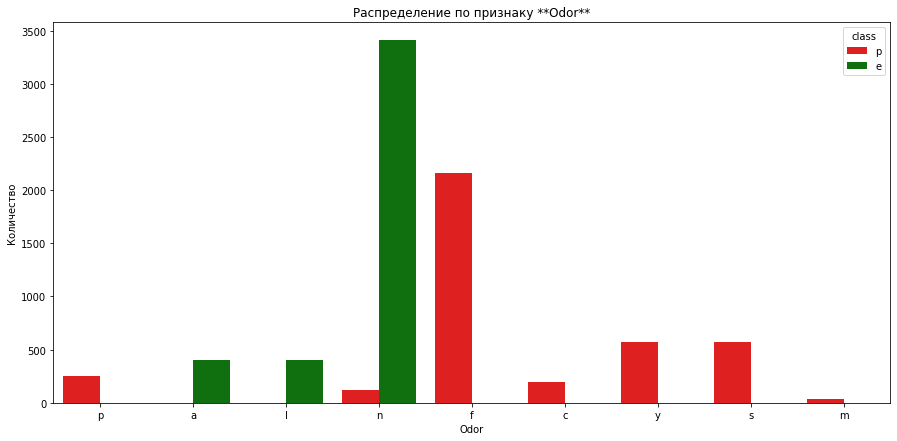

In [15]:
plot(col='odor', hue='class')

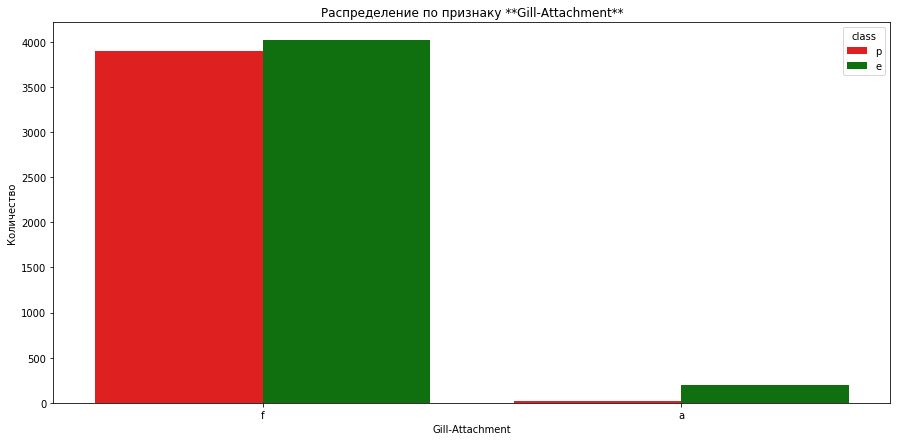

In [16]:
plot(col='gill-attachment', hue='class')

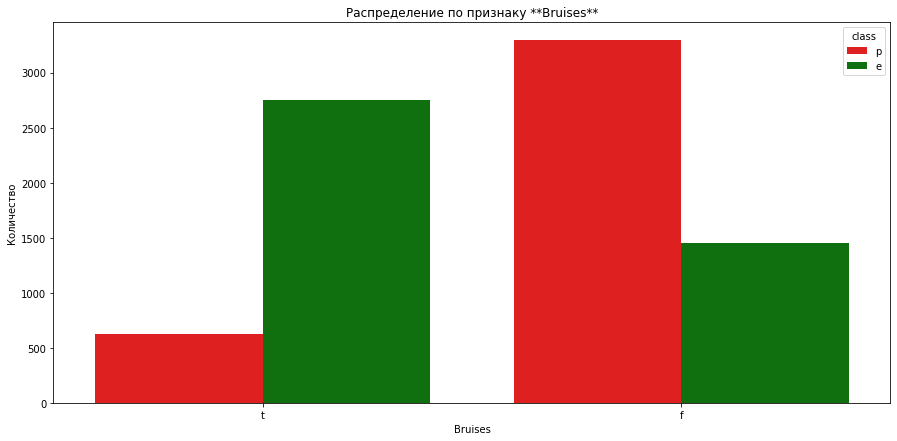

In [17]:
plot(col='bruises', hue='class')

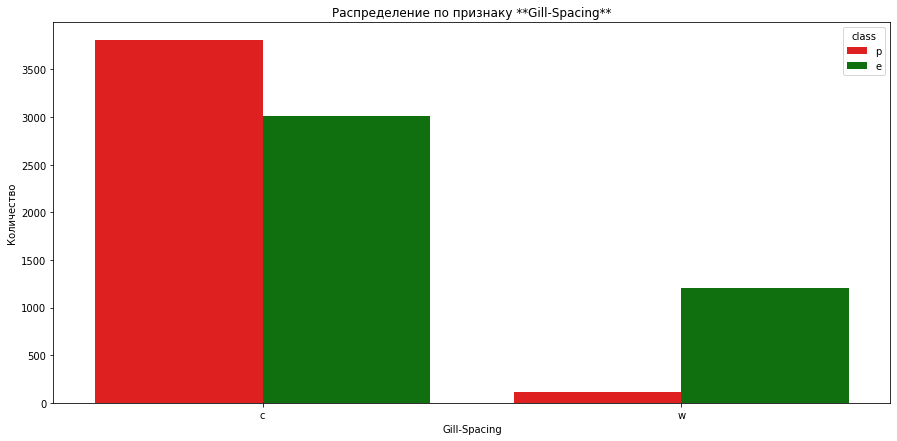

In [18]:
plot(col='gill-spacing', hue='class')

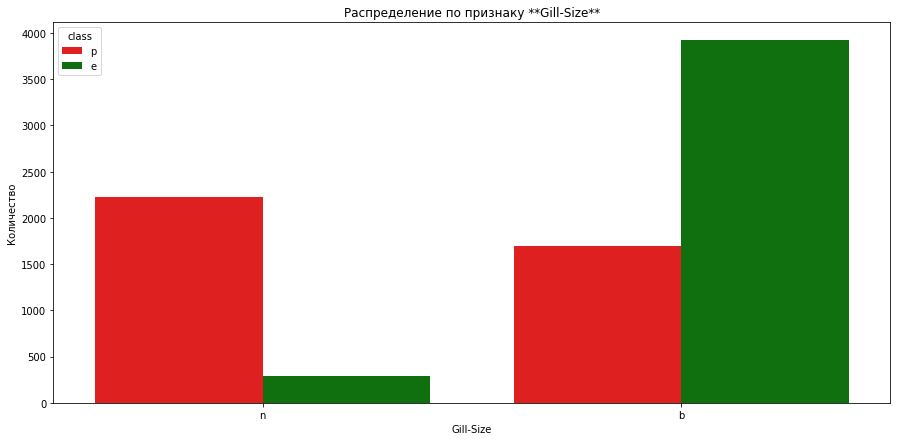

In [19]:
plot(col='gill-size', hue='class')

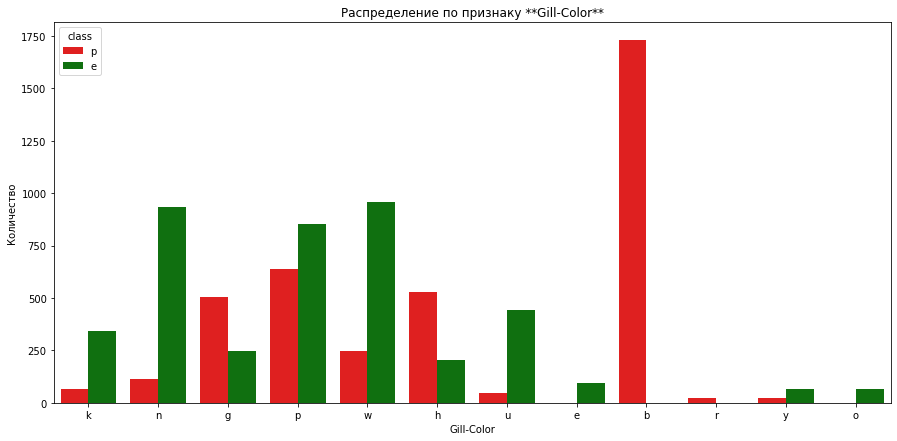

In [20]:
plot(col='gill-color', hue='class')

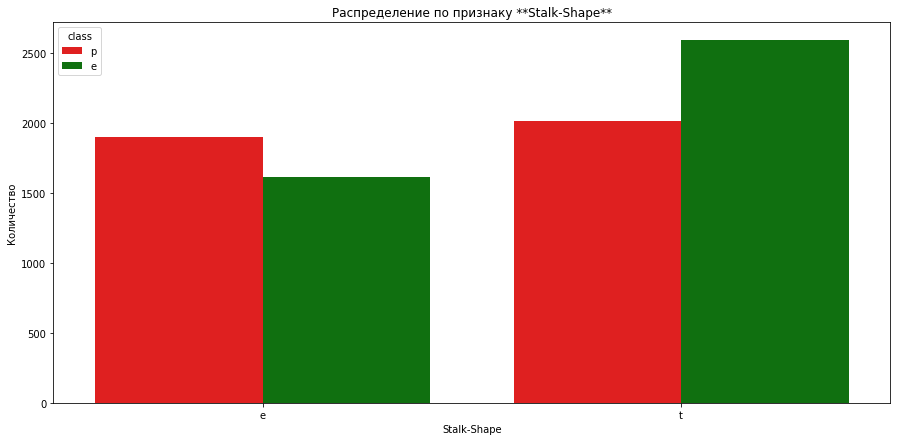

In [21]:
plot(col='stalk-shape', hue='class')

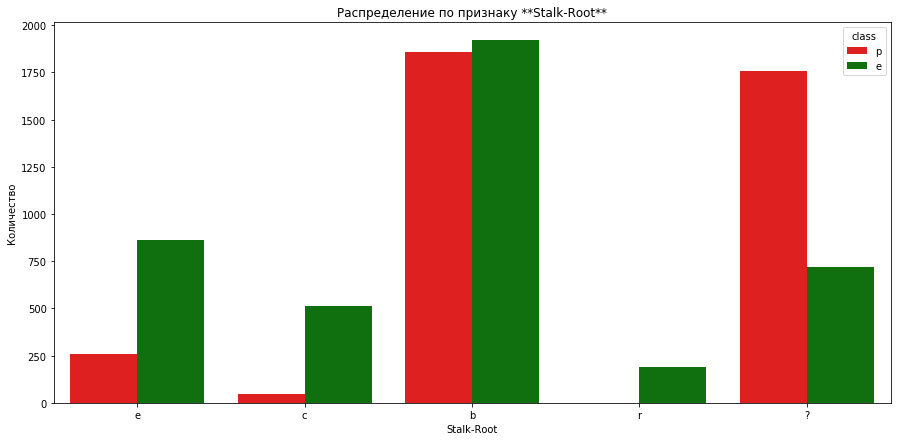

In [22]:
plot(col='stalk-root', hue='class')

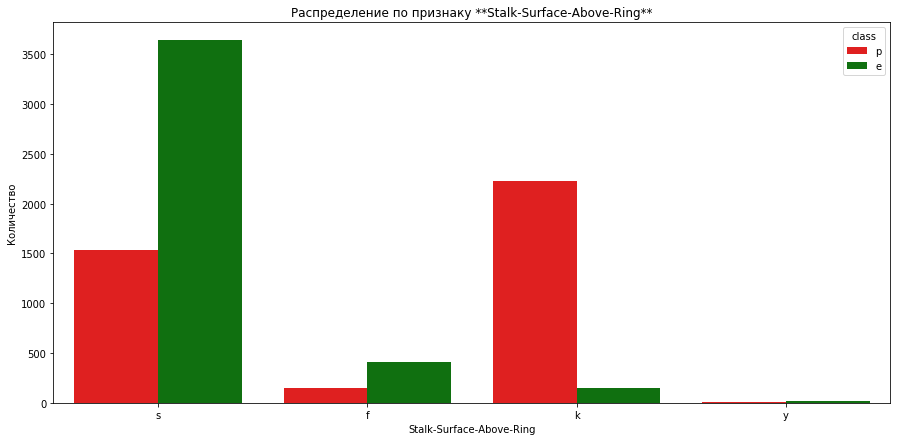

In [23]:
plot(col='stalk-surface-above-ring', hue='class')

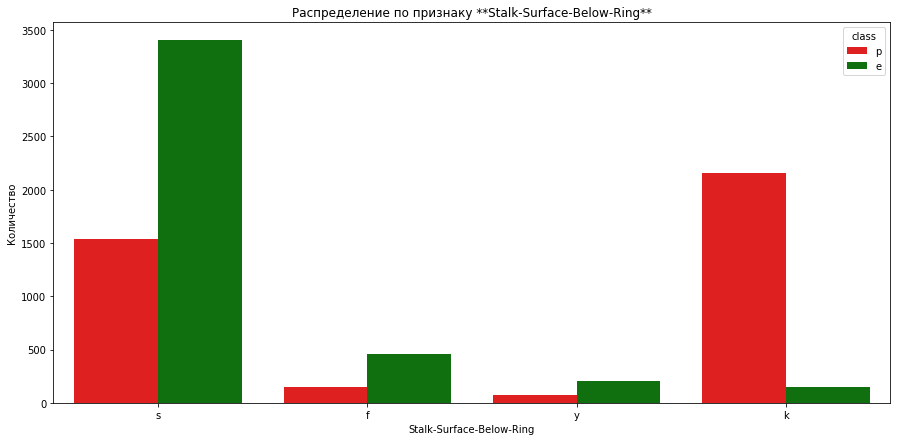

In [24]:
plot(col='stalk-surface-below-ring', hue='class')

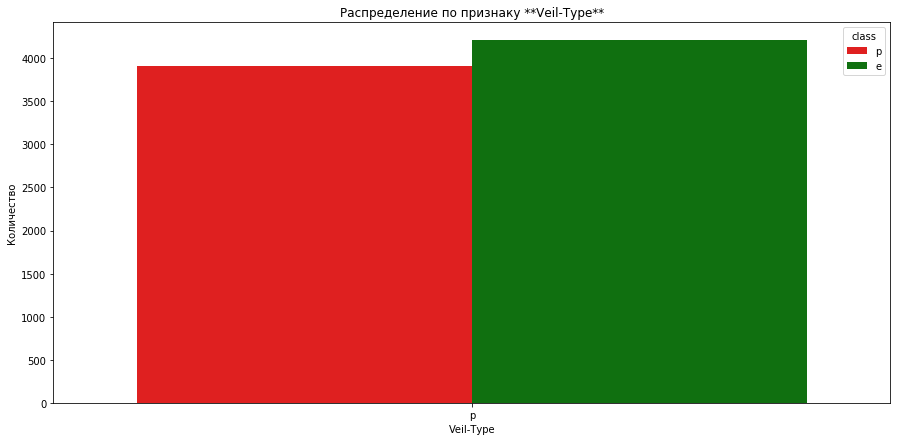

In [25]:
plot(col='veil-type', hue='class')

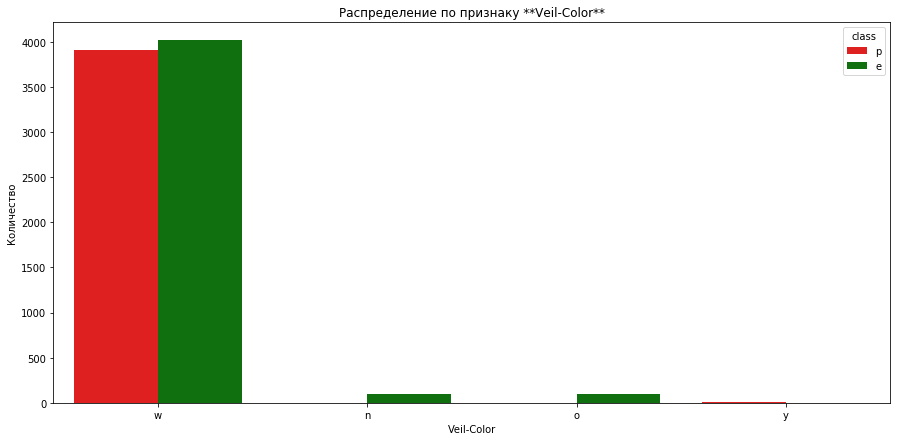

In [26]:
plot(col='veil-color', hue='class')

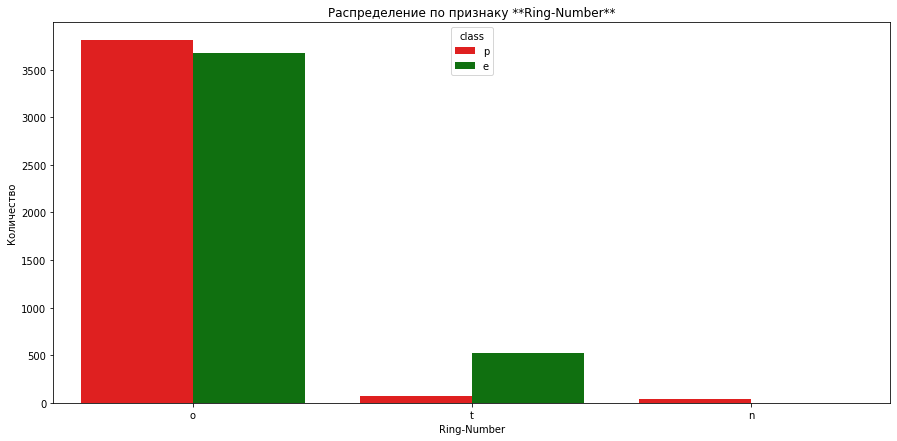

In [27]:
plot(col='ring-number', hue='class')

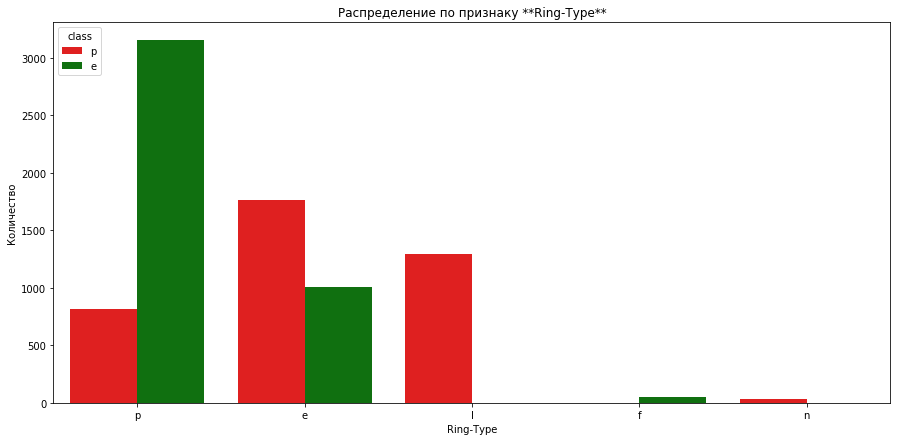

In [28]:
plot(col='ring-type', hue='class')

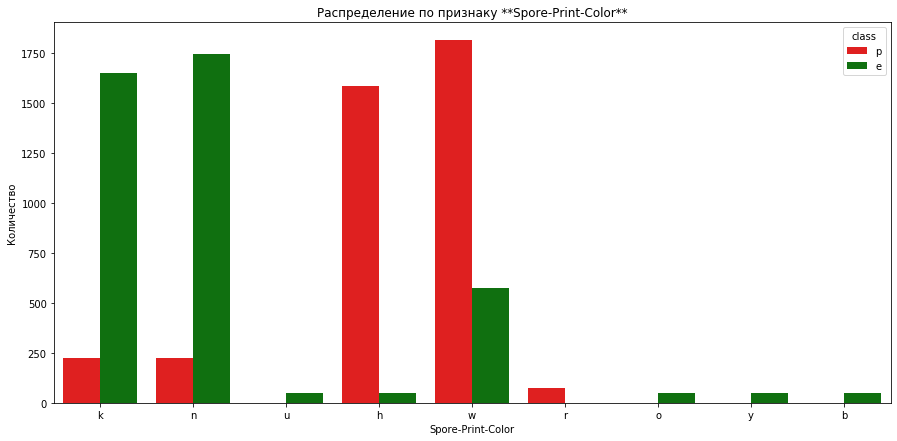

In [29]:
plot(col='spore-print-color', hue='class')

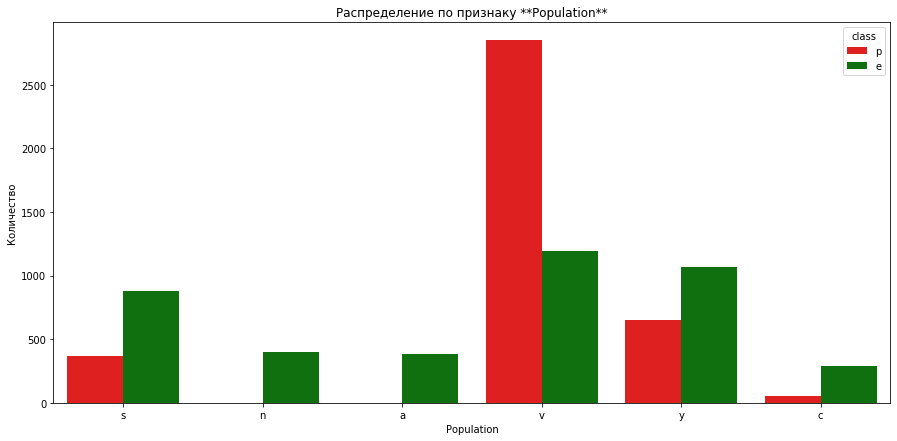

In [30]:
plot(col='population', hue='class')

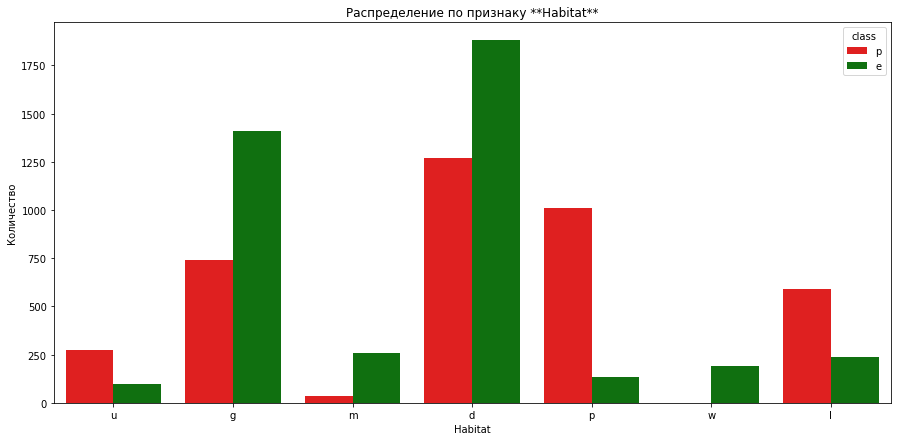

In [31]:
plot(col='habitat', hue='class')

## Инсайты, полученные после визуального анализа данных

<ul>
  <p>Существуют комбинации признаков, присутствие которых с подавляющем большинством выражено только у ядовитых грибов <br>
      Среди них:</p>
  <li>spore-print-color: h, w, r</li>
  <li>Ring-type: l</li>
  <li>Odor: p, f, c, y, s, m</li>
  <li>Gill-Color: b, r</li>
  <li>Stalk-Surface-Above-Ring: k</li>
  <li>Stalk-Surface-Below-Ring: k</li>
  <li>Spore-Print-Color : h, w, r</li>
  <li>Habitat: p</li>
  <li>Population: v</li>
</ul>

## Анализ количества и распределения отсутствующих значений

In [32]:
msh.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Пропущенные значения отсутствуют

## Проведем так называемый Feature Engineering

**Задача:** преобразовать категориальные признаки в числовое представление
<br>
Как уже было сказано ранее, все признаки за исключением ring-number предлагается рассматривать в качестве номинальных. Они будут переведены в номинальную шкалу и декодированы при помощи техники **one-hot-encoding**
<br>
**ring-number** представим при помощи техники label-encoding

<br>
<br>
Аналогично label-encoding будет применен к целевому признаку 
**class**

In [33]:
do_one_hot_with = set(msh.columns.tolist())
do_one_hot_with.remove('ring-number')
do_one_hot_with.remove('class')
do_one_hot_with = list(do_one_hot_with)

do_only_label_encoding_with = ['ring-number']

In [34]:
len(do_one_hot_with)

21

In [35]:
#для удобства работы создадим новый датафрейм
msh2 = msh.copy()

In [36]:
msh2.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


Сначала декодируем признак **ring-number**

In [37]:
def do_label_encode(feature_to_encode, df):
    feature_to_encode_cat_column = str(feature_to_encode) + '_cat'
    df[str(feature_to_encode_cat_column)] = df[str(feature_to_encode)].astype('category')
    df[str(feature_to_encode_cat_column)] = df[str(feature_to_encode_cat_column)].cat.codes
    df = df.drop([feature_to_encode], axis=1)
    return df

In [38]:
#до
msh2.head(1).T

,0
class,p
cap-shape,x
cap-surface,s
cap-color,n
bruises,t
odor,p
gill-attachment,f
gill-spacing,c
gill-size,n
gill-color,k


In [39]:
#после
msh2 = do_label_encode('ring-number', msh2)
msh2.head(1).T

,0
class,p
cap-shape,x
cap-surface,s
cap-color,n
bruises,t
odor,p
gill-attachment,f
gill-spacing,c
gill-size,n
gill-color,k


In [40]:
#тоже самое с целевой переменной class
msh2 = do_label_encode('class', msh2)
msh2.head(1).T

,0
cap-shape,x
cap-surface,s
cap-color,n
bruises,t
odor,p
gill-attachment,f
gill-spacing,c
gill-size,n
gill-color,k
stalk-shape,e


Отлично. Теперь преобразуем все остальные признаки

In [41]:
def do_one_hot_encode(feature_to_encode, df, label_encode=True):
    print('one-hot-encode для ',feature_to_encode)
    if label_encode == True:
        df = do_label_encode(feature_to_encode, df)
    feature_to_encode_cat_name = str(feature_to_encode) + '_cat'
    dum_df = pd.get_dummies(df, columns=[str(feature_to_encode_cat_name)], prefix=[str(feature_to_encode)])
    columns = set(df.columns.tolist())
    columns.remove(str(feature_to_encode_cat_name))
    columns = list(columns)
    dum_df = dum_df.drop(columns, axis=1)
    df = pd.concat([df, dum_df], axis=1)
    
    df = df.drop([feature_to_encode_cat_name], axis=1)

    return df

Пройдемся по все признакам циклом

In [42]:
print(len(do_one_hot_with))
for feature in do_one_hot_with:
    msh2 = do_one_hot_encode(feature, msh2)

21
one-hot-encode для  gill-color
one-hot-encode для  veil-color
one-hot-encode для  stalk-color-above-ring
one-hot-encode для  ring-type
one-hot-encode для  stalk-shape
one-hot-encode для  gill-size
one-hot-encode для  bruises
one-hot-encode для  veil-type
one-hot-encode для  gill-spacing
one-hot-encode для  stalk-color-below-ring
one-hot-encode для  cap-shape
one-hot-encode для  stalk-root
one-hot-encode для  cap-surface
one-hot-encode для  population
one-hot-encode для  stalk-surface-above-ring
one-hot-encode для  spore-print-color
one-hot-encode для  stalk-surface-below-ring
one-hot-encode для  habitat
one-hot-encode для  cap-color
one-hot-encode для  gill-attachment
one-hot-encode для  odor


In [43]:
msh2.head(2).T

,0,1
ring-number_cat,1,1
class_cat,1,0
gill-color_0,0,0
gill-color_1,0,0
gill-color_2,0,0
gill-color_3,0,0
gill-color_4,1,1
gill-color_5,0,0
gill-color_6,0,0
gill-color_7,0,0


## Построение совместного распределения каждого признака и целевой переменной

In [44]:
import seaborn as sns

C:\programms\Anaconda\lib\site-packages\seaborn\axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


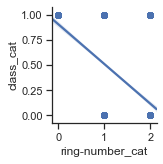

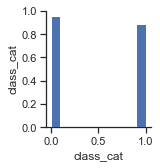

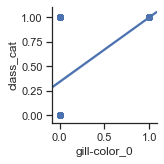

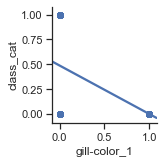

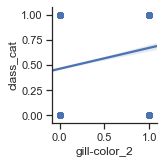

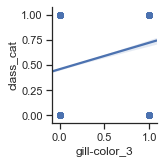

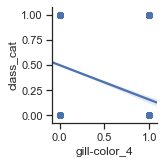

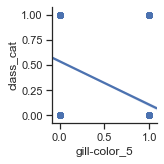

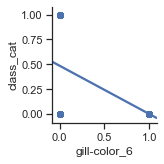

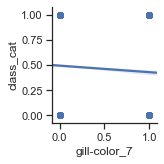

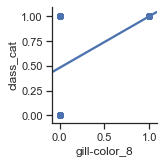

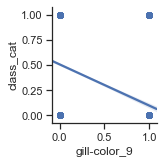

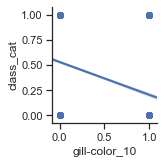

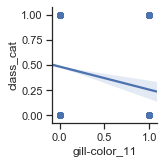

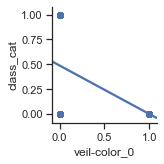

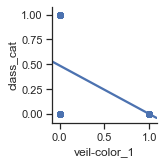

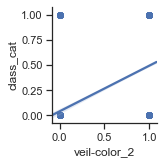

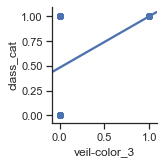

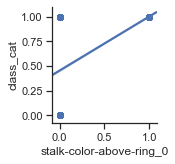

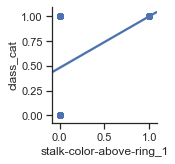

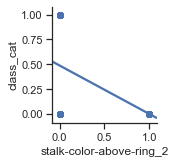

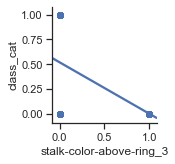

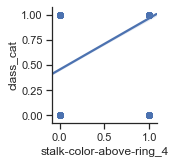

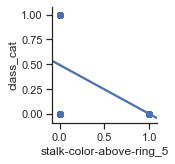

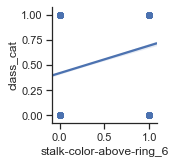

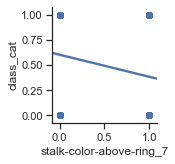

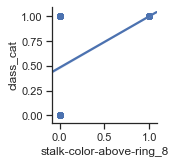

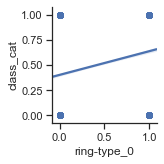

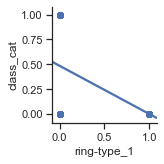

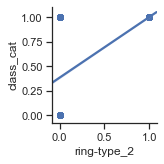

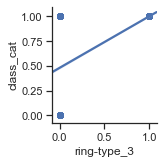

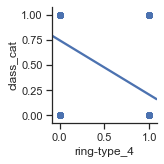

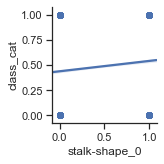

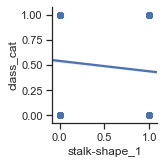

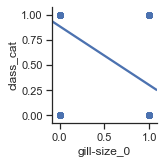

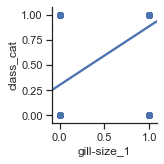

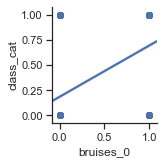

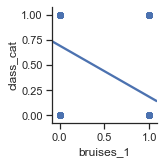

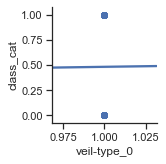

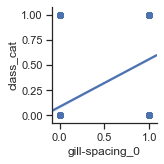

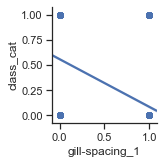

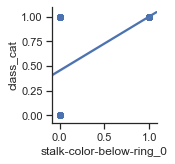

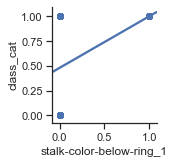

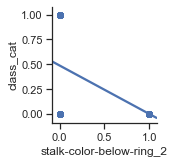

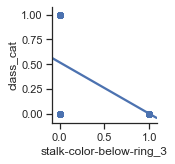

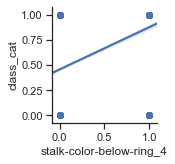

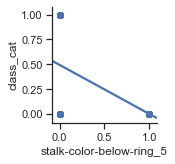

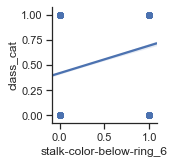

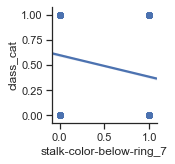

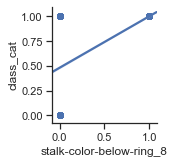

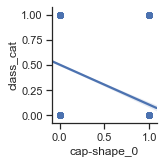

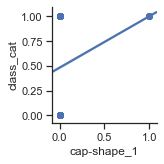

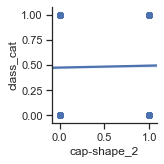

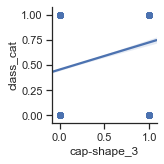

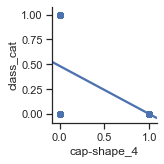

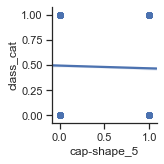

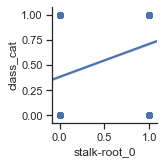

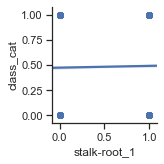

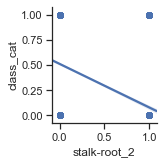

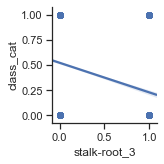

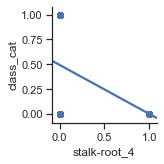

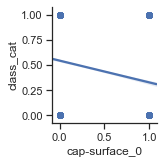

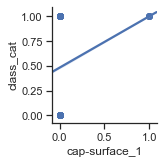

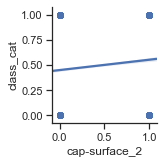

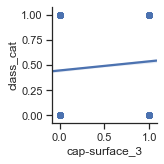

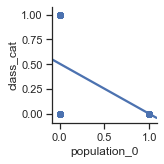

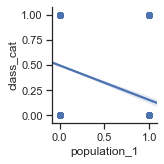

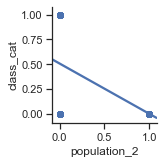

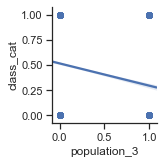

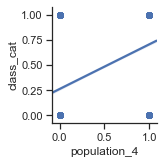

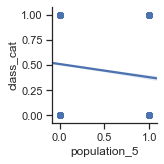

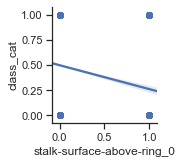

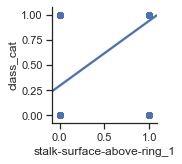

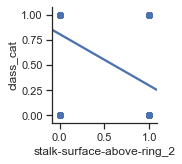

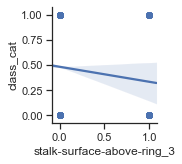

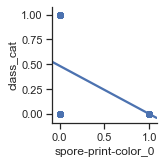

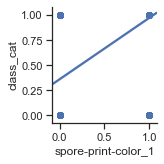

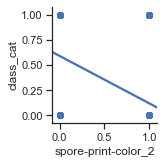

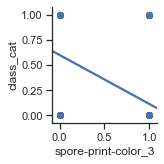

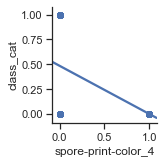

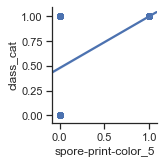

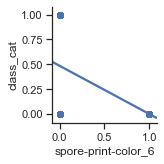

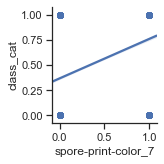

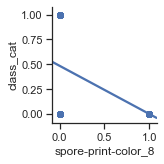

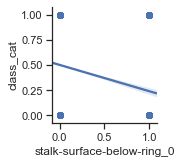

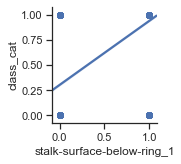

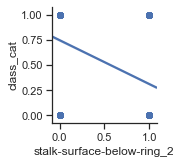

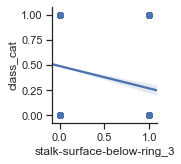

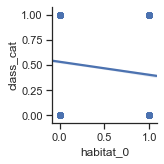

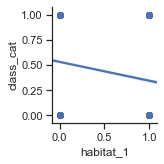

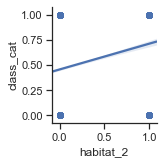

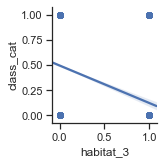

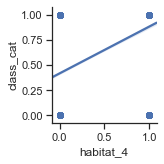

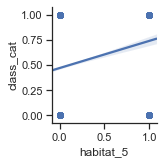

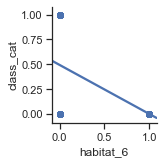

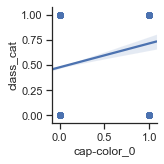

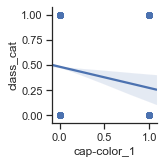

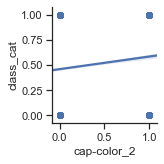

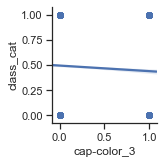

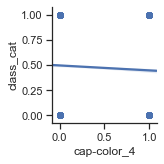

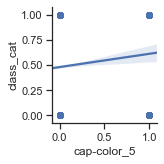

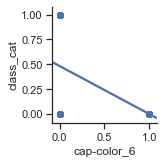

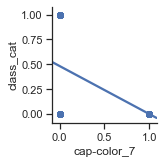

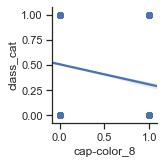

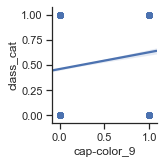

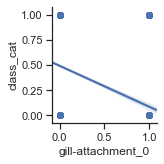

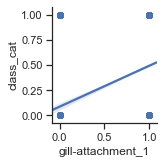

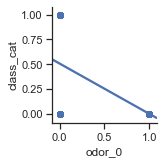

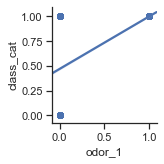

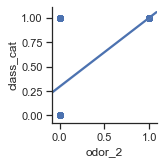

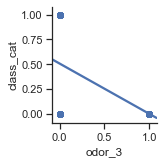

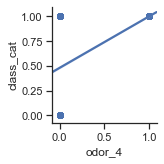

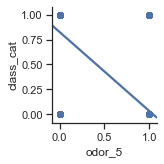

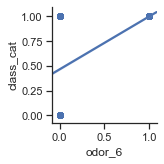

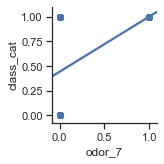

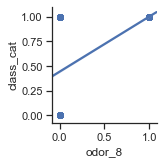

In [45]:
sns.set(style="ticks", color_codes=True)
for col in msh2.columns:
    sns.pairplot(msh2, kind='reg', x_vars=list([col]),y_vars="class_cat")

Можно наблюдать, что некоторые признаки сильно коррелируют со "съедобностью" и наоборот

## Построение корреляционной матрицы

In [46]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
msh2.corr(method=histogram_intersection)

,ring-number_cat,class_cat,gill-color_0,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,...,gill-attachment_1,odor_0,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8
ring-number_cat,1.0,3880.0,1728.0,96.0,752.0,732.0,408.0,1048.0,64.0,1492.0,...,7896.0,400.0,192.0,2160.0,400.0,0.0,3528.0,256.0,576.0,576.0
class_cat,3880.0,1.0,1728.0,0.0,504.0,528.0,64.0,112.0,0.0,640.0,...,3898.0,0.0,192.0,2160.0,0.0,36.0,120.0,256.0,576.0,576.0
gill-color_0,1728.0,1728.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1728.0,0.0,0.0,576.0,0.0,0.0,0.0,0.0,576.0,576.0
gill-color_1,96.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0
gill-color_2,752.0,504.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,752.0,64.0,48.0,432.0,64.0,0.0,144.0,0.0,0.0,0.0
gill-color_3,732.0,528.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,732.0,0.0,0.0,528.0,0.0,0.0,204.0,0.0,0.0,0.0
gill-color_4,408.0,64.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,408.0,64.0,0.0,0.0,64.0,0.0,216.0,64.0,0.0,0.0
gill-color_5,1048.0,112.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,984.0,112.0,48.0,0.0,112.0,0.0,712.0,64.0,0.0,0.0
gill-color_6,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0
gill-color_7,1492.0,640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1492.0,48.0,48.0,528.0,48.0,0.0,756.0,64.0,0.0,0.0


# Подготовка тестового набора данных

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X, y = msh2.drop(['class_cat'], axis=1), msh2['class_cat']
print(X.shape, y.shape)

(8124, 115) (8124,)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Моделирование. Классификация

Предлагается провести сравнение эффективности 5 моделей машинного обучения: 
<ul>
    <li>Логистической регрессии</li>
    <li>Дерева решений</li>
    <li>Случайный лес</li>
    <li>Метода опорных векторов</li>
    <li>Алгоритма k-ближайших соседей sklearn</li>
    <li>Самописного алгоритма k-ближайших соседей</li>

</ul>

## Логистическая регрессия со стохастическим градиентным спуском

In [56]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [57]:
clf = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, tol=1e-3))

In [58]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [59]:
y_pred_log = clf.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [61]:
confusion_matrix(y_test, y_pred_log)

array([[845,   0],
       [  0, 780]], dtype=int64)

In [62]:
print(classification_report(y_test, y_pred_log, target_names=['ядовитые','съедобные'])[:220])

              precision    recall  f1-score   support

    ядовитые       1.00      1.00      1.00       845
   съедобные       1.00      1.00      1.00       780

    accuracy                           1.00      1625
  


# Дерево решений

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
clf = DecisionTreeClassifier()

In [65]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
y_pred_dt = clf.predict(X_test)

In [67]:
confusion_matrix(y_test, y_pred_dt)

array([[845,   0],
       [  0, 780]], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred_dt, target_names=['ядовитые','съедобные'])[:220])

              precision    recall  f1-score   support

    ядовитые       1.00      1.00      1.00       845
   съедобные       1.00      1.00      1.00       780

    accuracy                           1.00      1625
  


# Случайный лес

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\programms\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_pred_rf = clf.predict(X_test)

In [72]:
confusion_matrix(y_test, y_pred_rf)

array([[845,   0],
       [  0, 780]], dtype=int64)

In [73]:
print(classification_report(y_test, y_pred_rf, target_names=['ядовитые','съедобные'])[:220])

              precision    recall  f1-score   support

    ядовитые       1.00      1.00      1.00       845
   съедобные       1.00      1.00      1.00       780

    accuracy                           1.00      1625
  


# Метод опорных векторов

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [75]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [76]:
y_pred_svm = clf.predict(X_test)

In [77]:
confusion_matrix(y_test, y_pred_svm)

array([[845,   0],
       [  2, 778]], dtype=int64)

In [78]:
print(classification_report(y_test, y_pred_svm, target_names=['ядовитые','съедобные'])[:220])

              precision    recall  f1-score   support

    ядовитые       1.00      1.00      1.00       845
   съедобные       1.00      1.00      1.00       780

    accuracy                           1.00      1625
  


# Алгоритм k-ближайших соседей

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [81]:
y_pred_knn = clf.predict(X_test)

In [82]:
confusion_matrix(y_test, y_pred_knn)

array([[845,   0],
       [  0, 780]], dtype=int64)

In [83]:
print(classification_report(y_test, y_pred_knn, target_names=['0','1'])[:220])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
  


# Реализация алгоритма k-ближайших соседей без библиотеки sklearn

Хорошее описание алгоритма представлено на википедии:
https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9

Для реализации работы алгоритма k-ближайших соседей предлагается использование нижеприведенных функций

In [84]:
def trnsf_to_np_arr(df, y_train=pd.DataFrame([]), train=True):
    if train == True:
        if y_train.empty == False:
            X_train_arr = df.to_numpy()
            y_train_arr = y_train.to_numpy()
            return X_train_arr, y_train_arr
        #отдельно получить np array с классами грибов
        else:
            return [], []
        
    else:
        X_test_array = df.to_numpy()
        return X_test_array
    
def find_distance(x_test, x_train):
    diff = x_test - x_train
    power2 = np.power(diff, 2) #возводим в квадрат
    diff_sum = np.sum(power2)
    return diff_sum

def predict(test_data, train_data, nn_nmbr=3):
    y_pred = [] #сюда будем записывать предсказанные классы
    for test_msh in test_data: #для каждого гриба из !тестового! набора
        counter = 0
        distances = [] #сюда будем записывать расстояния до грибов из !тренировочного! набора
        for train_msh in train_data:
            diff_sum = find_distance(test_msh, train_msh)
            distances.append({'id':counter,'diff':diff_sum})
            counter += 1
        distances = sorted(distances, key = lambda i: i['diff']) #сортируем расстояния по длине
        neighbors = [distances[nmbr] for nmbr in range(nn_nmbr)] #добавляем в список ближайших соседей 
        neighbors_labels = [y_train_arr[n['id']] for n in neighbors] #записываем классы грибов соседей
        y_pred.append(int(round(sum(neighbors_labels)/nn_nmbr))) #находим целевую переменную
    return y_pred

In [85]:
X_train.shape, X_test.shape, y_train.shape

((6499, 115), (1625, 115), (6499,))

Для работы алгоритма необходимо перевести данные из pandas DataFrame в numpy array

In [86]:
X_train_arr, y_train_arr = trnsf_to_np_arr(X_train,y_train)
X_test_array = trnsf_to_np_arr(X_test, train=False)

In [87]:
X_train_arr.shape, X_test_array.shape, y_train_arr.shape

((6499, 115), (1625, 115), (6499,))

Предсказываем

In [88]:
y_pred_my_knn = predict(X_test_array, X_train_arr)

In [89]:
confusion_matrix(y_test, y_pred_my_knn)

array([[845,   0],
       [  0, 780]], dtype=int64)

In [90]:
print(classification_report(y_test, y_pred_my_knn, target_names=['ядовитые','съедобные'])[:220])

              precision    recall  f1-score   support

    ядовитые       1.00      1.00      1.00       845
   съедобные       1.00      1.00      1.00       780

    accuracy                           1.00      1625
  


# Обобщенные результаты моделирования

In [91]:
print('***Логистическая регрессия\n\n\n',classification_report(y_test, y_pred_log, target_names=['ядовитые','съедобные'])[:220])
print('\n***Дерево решений\n\n\n',classification_report(y_test, y_pred_dt, target_names=['ядовитые','съедобные'])[:220])
print('\n***Случайный лес (1000 деревьев)\n\n\n',classification_report(y_test, y_pred_rf, target_names=['ядовитые','съедобные'])[:220])
print('\n***Метод опорных векторов\n\n\n',classification_report(y_test, y_pred_svm, target_names=['ядовитые','съедобные'])[:220])
print('\n***Алгоритм k-ближайших соседей (sklearn)\n\n\n',classification_report(y_test, y_pred_knn, target_names=['ядовитые','съедобные'])[:220])
print('\n***Метод опорных векторов (самописный)\n\n\n',classification_report(y_test, y_pred_my_knn, target_names=['ядовитые','съедобные'])[:220])

***Логистическая регрессия


               precision    recall  f1-score   support

    ядовитые       1.00      1.00      1.00       845
   съедобные       1.00      1.00      1.00       780

    accuracy                           1.00      1625
  

***Дерево решений


               precision    recall  f1-score   support

    ядовитые       1.00      1.00      1.00       845
   съедобные       1.00      1.00      1.00       780

    accuracy                           1.00      1625
  

***Случайный лес (1000 деревьев)


               precision    recall  f1-score   support

    ядовитые       1.00      1.00      1.00       845
   съедобные       1.00      1.00      1.00       780

    accuracy                           1.00      1625
  

***Метод опорных векторов


               precision    recall  f1-score   support

    ядовитые       1.00      1.00      1.00       845
   съедобные       1.00      1.00      1.00       780

    accuracy                           1.00      1625


**Вывод**

Все модели отлично справились с поставленнойо задачей.
Все метрики показывают максимально возможные значения.

Исключение составляет метод опорных векторов (Support Vector Machine), который дважды ошибся и тем не менее также превосходно сработал, потому что такая ошибка в масштабе всего набора данных ничтожна.